# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# 2. Import Dataset

In [2]:
df = pd.read_csv('train_new.csv', index_col= 'Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,84,Good,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,40,Above Average,8
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,0,Above Average,32
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,60,Very Good,69


In [6]:
pd.options.display.max_columns = 100
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,84,Good,8


In [7]:
df.shape

(1460, 75)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSSubClass                   1460 non-null   int64  
 1   MSZoning                     1460 non-null   object 
 2   LotFrontage                  1201 non-null   float64
 3   LotArea                      1460 non-null   int64  
 4   Street                       1460 non-null   object 
 5   LotShape                     1460 non-null   object 
 6   LandContour                  1460 non-null   object 
 7   Utilities                    1460 non-null   object 
 8   LotConfig                    1460 non-null   object 
 9   LandSlope                    1460 non-null   object 
 10  Neighborhood                 1460 non-null   object 
 11  Condition1                   1460 non-null   object 
 12  Condition2                   1460 non-null   object 
 13  BldgType          

### Data Description

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotPorch,Age_of_House
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1.767123,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,87.084932,36.547945
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,0.747315,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,105.190364,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,8.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,48.000000,35.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,136.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,4.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1027.000000,136.000000


In [7]:
df.describe(include='O')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,HouseRate_Cond_and_Material
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,9,6,10
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal,Above Average
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,1267,1198,730


# Dataset Splitting

In [8]:
X = df.drop(columns="SalePrice")
y = df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 74), (292, 74), (1168,), (292,))

### Selecting the columns as a numerical features

In [12]:
numeric_features = X_train.select_dtypes(include=[np.number])

In [10]:
numeric_features = list(numeric_features.drop(columns=['BsmtHalfBath','BsmtFullBath','Fireplaces','FullBath','HalfBath', 'GarageCars','KitchenAbvGr','OverallCond','OverallQual','BedroomAbvGr','KitchenAbvGr']))

###  Selecting the columns as a categorical features

In [16]:
categoric_features = X_train.select_dtypes(include = [np.object])

In [17]:
categoric_features

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,HouseRate_Cond_and_Material
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,Above Average
1067,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Good
639,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,None,TA,TA,CBlock,Fa,TA,No,Unf,Unf,GasA,Gd,Y,FuseA,TA,Typ,NaN,NaN,NaN,NaN,NaN,P,WD,Normal,Above Average
800,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Normal,Above Average
381,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,Above Average
1131,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,None,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,WD,Normal,Below Average
1295,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,WdShing,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD,Normal,Above Average


In [18]:
df.HouseRate_Cond_and_Material

Id
1       Above Average
2                Good
3       Above Average
4       Above Average
5                Good
            ...      
1456    Above Average
1457    Above Average
1458        Very Good
1459    Above Average
1460    Above Average
Name: HouseRate_Cond_and_Material, Length: 1460, dtype: object

In [21]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [19]:
categoric_features = list(categoric_features.drop(columns=['HouseRate_Cond_and_Material','KitchenQual','LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtExposure','BsmtQual','BsmtFinType1','Electrical','BsmtFinType2','HeatingQC','PavedDrive','GarageCond','GarageQual','GarageFinish','Functional','FireplaceQu','Neighborhood','Exterior1st','Exterior2nd','LandContour']))

### Selecting the type of categorical columns

In [14]:
categorical2 = list(X_train[['BsmtHalfBath','BsmtFullBath','Fireplaces','FullBath','HalfBath', 'GarageCars','OverallCond','OverallQual','BedroomAbvGr','KitchenAbvGr']])

In [15]:
Ordinal = list(X_train[['HouseRate_Cond_and_Material','KitchenQual','LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtExposure','BsmtQual','BsmtFinType1','Electrical','BsmtFinType2','HeatingQC','PavedDrive','GarageCond','GarageQual','GarageFinish','Functional','FireplaceQu','LandContour']])

In [16]:
Binary = list(X_train[['Neighborhood','Exterior1st','Exterior2nd']])

### Selecting encoder 

In [1]:
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [18]:
cat_pipe2 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('OrdinalEncoder', ce.OrdinalEncoder())
])

In [19]:
cat_pipe3 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('BinaryEncoder', ce.BinaryEncoder())
])

# Modeling

In [2]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [21]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_features),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_features),
    ('categoric2', cat_pipe(), categorical2),
    ('ordinal', cat_pipe2, Ordinal),
    ('binary', cat_pipe3, Binary),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=100, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'algo__colsample_bytree': 0.43906507294414676, 'algo__gamma': 10, 'algo__learning_rate': 0.057780555559023464, 'algo__max_depth': 6, 'algo__n_estimators': 158, 'algo__reg_alpha': 2.3360153518075046, 'algo__reg_lambda': 2.2558738962142417, 'algo__subsample': 0.5343465798974851}
0.9842563593589064 0.8770604018140694 0.9032601344842898


# Feature Importance

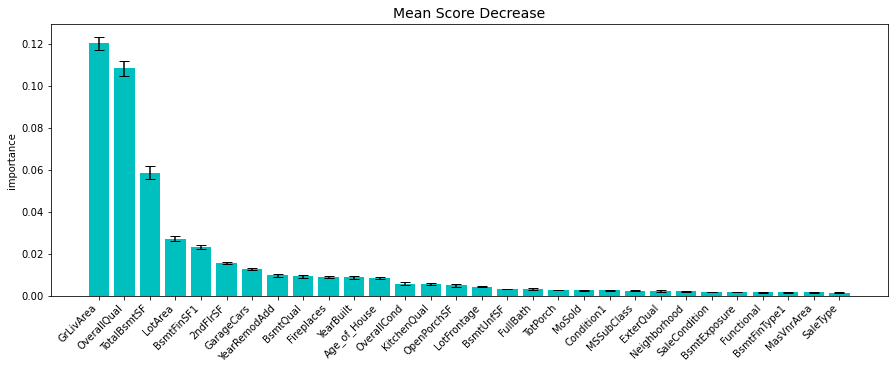

In [22]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=30)

In [23]:
from jcopml.tuning.skopt import BayesSearchCV
from jcopml.tuning import bayes_search_params as bsp

In [24]:
numeric_imp = ['GrLivArea','LotArea','BsmtFinSF1','2ndFlrSF','YearRemodAdd','YearBuilt','Age_of_House','OpenPorchSF',
               'LotFrontage','BsmtUnfSF','MasVnrArea','TotPorch','MSSubClass','MoSold','TotalBsmtSF']
categoric_imp = ['Condition1','SaleCondition','SaleType']
categoric_imp2 = ['OverallCond','OverallQual','Fireplaces','FullBath','GarageCars']
Ordinal_imp = ['BsmtExposure','BsmtFinType1','KitchenQual','BsmtQual','ExterQual','Functional']
Binary_imp = ['Neighborhood']

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_imp),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_imp),
    ('categoric2', cat_pipe(), categoric_imp2),
    ('ordinal', cat_pipe2, Ordinal_imp),
    ('binary', cat_pipe3, Binary_imp),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=100, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
0.9822835221778088 0.8867332191192752 0.9148159300203771


`Feature Importance can be increasing test scores model. Thus, I'll keep it`

# Polynomial Feature

In [26]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), numeric_imp),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_imp),
    ('categoric2', cat_pipe(), categoric_imp2),
    ('ordinal', cat_pipe2, Ordinal_imp),
    ('binary', cat_pipe3, Binary_imp),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3, n_iter=100, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'algo__colsample_bytree': 0.2559648880637612, 'algo__gamma': 1, 'algo__learning_rate': 0.07668394719536059, 'algo__max_depth': 6, 'algo__n_estimators': 147, 'algo__reg_alpha': 0.005388451626382902, 'algo__reg_lambda': 5.475906062783612, 'algo__subsample': 0.6191352969216752, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.9771532155033167 0.8790945150087793 0.9104704601399577


`Polynomial has decreased test scores model that don't. Thus, I won't use it`

# Hyperparameter Tuning

In [27]:
from jcopml.tuning.space import Integer, Real
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_imp),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_imp),
    ('categoric2', cat_pipe(), categoric_imp2),
    ('ordinal', cat_pipe2, Ordinal_imp),
    ('binary', cat_pipe3, Binary_imp),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


parameter ={'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-5, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=170, high=350),
             'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
             'algo__gamma': Integer(low=4, high=15),
             'algo__colsample_bytree': Real(low=0.2, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-5, high=0.8, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-3, high=0, prior='log-uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'algo__colsample_bytree': 0.8946408856284696, 'algo__gamma': 11, 'algo__learning_rate': 0.05511863475708371, 'algo__max_depth': 4, 'algo__n_estimators': 216, 'algo__reg_alpha': 0.0014084394991420053, 'algo__reg_lambda': 0.028416393335053507, 'algo__subsample': 0.609127385765148}
0.9843531750423211 0.8649748726599942 0.9289844591133128


# Evaluation

In [29]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


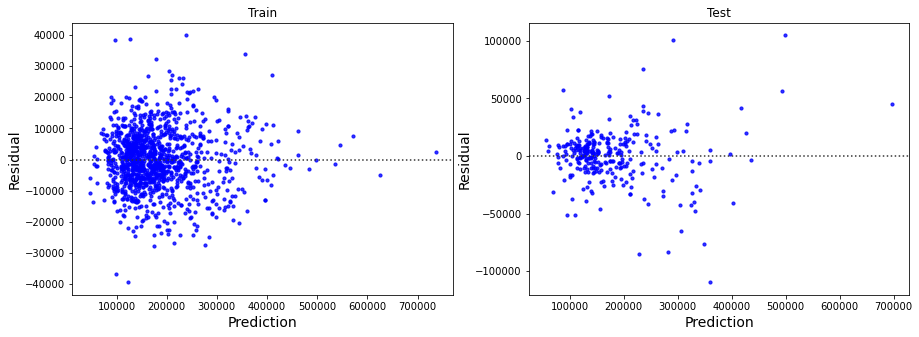

In [30]:
plot_residual(X_train, y_train, X_test, y_test, model)

In [31]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotPorch,HouseRate_Cond_and_Material,Age_of_House,pred,actual,error
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
899,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,0,0,2364,1,0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3,TA,TA,Y,0,67,0,0,0,0,0,3,2010,New,Partial,67,Good,1,499202.625000,611657,112454.375000
582,20,RL,98.0,12704,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,0,0,2042,0,0,2,1,3,1,Ex,Typ,1,Gd,Attchd,RFn,3,TA,TA,Y,0,90,0,0,0,0,0,8,2009,New,Partial,90,Good,1,358878.468750,253293,105585.468750
775,20,RL,110.0,14226,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,375.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1935,1935,GasA,Gd,Y,SBrkr,0,0,1973,0,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,Fin,3,TA,TA,Y,315,45,0,0,0,0,0,7,2007,New,Partial,45,Good,1,291981.375000,395000,103018.625000
589,20,RL,65.0,25095,Pave,IR1,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,5,8,1968,2003,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Gd,GLQ,1324,Unf,0,113,1437,GasA,Ex,Y,SBrkr,0,0,1473,2,0,1,0,1,1,Ex,Typ,2,Gd,Attchd,Unf,1,TA,TA,Y,0,48,0,0,60,0,0,6,2009,WD,Partial,108,Good,41,227141.640625,143000,84141.640625
530,20,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,0,0,2515,1,0,3,0,4,2,TA,Maj1,2,TA,Attchd,RFn,2,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200,Average,50,281911.062500,200624,81287.062500
219,50,RL,NaN,15660,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,9,1939,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,No,BLQ,341,Unf,0,457,798,GasA,Ex,Y,SBrkr,817,0,1954,0,1,1,1,3,1,Gd,Typ,2,TA,Attchd,Unf,2,TA,TA,Y,0,119,150,0,0,0,0,5,2008,WD,Normal,269,Very Good,69,235124.968750,311500,76375.031250
262,60,RL,69.0,9588,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,CemntBd,CmentBd,Stone,270.0,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1482,1482,GasA,Ex,Y,SBrkr,1092,0,2574,0,0,2,1,3,1,Ex,Typ,1,Gd,BuiltIn,Fin,3,TA,TA,Y,0,148,0,0,0,0,0,11,2007,New,Partial,148,Good,0,348590.406250,276000,72590.406250
1047,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,876,0,2868,0,0,3,1,4,1,Ex,Typ,1,Gd,BuiltIn,Fin,3,TA,TA,Y,214,108,0,0,0,0,0,7,2006,New,Partial,108,Good,1,492446.937500,556581,64134.062500
71,20,RL,95.0,13651,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880,Unf,0,343,2223,GasA,Ex,Y,SBrkr,0,0,2223,1,0,2,0,3,1,TA,Typ,2,Gd,Attchd,Fin,2,TA,TA,Y,300,0,0,0,0,0,0,2,2007,WD,Normal,0,Good,34,306071.312500,244000,62071.312500


# Summary Result

In [32]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.9843531750423211
R2 Test : 0.9289844591133128
MAE Train : 7426.45778708262
MAE Test : 15545.094004173801
MSE Train : 93326275.74352586
MSE Test : 544712364.3807251
RMSE Train : 9660.552558913278
RMSE Test : 23339.07376869796


# Save the Model

In [33]:
save_model(model.best_estimator_, "Ames_House_Prediction_XGBoost_Regressor.pkl")

Model is pickled as model/Ames_House_Prediction_XGBoost_Regressor.pkl


# Submission

In [34]:
df2 = pd.read_csv('data/test.csv', index_col= 'Id')

In [36]:
df2.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace= True)
df2.shape

(1459, 75)

In [37]:
df2.drop(columns= ['GarageYrBlt', '1stFlrSF','TotRmsAbvGrd','GarageArea'], inplace= True)

In [38]:
df2['TotPorch'] = df2['3SsnPorch'] + df2.EnclosedPorch + df2.ScreenPorch + df2.OpenPorchSF

In [39]:
df2['HouseRate_Cond_and_Material'] = df2.OverallQual + df2.OverallCond

In [40]:
df2['HouseRate_Cond_and_Material'] = pd.cut(df2['HouseRate_Cond_and_Material'],bins= [0,2,4,6,8,10,12,14,16,18,20], labels=['Very Poor','Poor','Fair','Below Average','Average','Above Average','Good',
'Very Good','Excellent','Very Excellent'])                                                                

In [41]:
df2['Age_of_House'] = df2['YrSold'] - df2['YearBuilt']   

In [43]:
df2.to_csv('test_new.csv', index= True)

In [44]:
def submission (model, filename = 'malikafu2__v1.csv'):
    df_submit = pd.read_csv('test_new.csv', index_col = 'Id')
    df_submit['SalePrice'] = model.predict(df_submit)
    df_submit[['SalePrice']].to_csv(filename, index_label = 'Id')

In [45]:
submission(model, filename = 'malikafu2__v1.csv')

In [46]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,0,0,1314,1,0,1,0,3,1,TA,Typ,0,NaN,Attchd,RFn,1,TA,TA,Y,250,0,0,0,0,0,0,6,2010,WD,Normal,0,Above Average,53
1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,772,0,1571,0,0,2,1,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,40,0,0,0,0,0,5,2009,WD,Normal,40,Good,16
639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,0,0,796,0,0,1,0,2,1,TA,Typ,0,NaN,NaN,NaN,0,NaN,NaN,P,328,0,164,0,0,0,0,5,2008,WD,Normal,164,Above Average,98
800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,787,0,1768,1,0,1,1,3,1,Gd,Typ,2,TA,Detchd,Unf,1,TA,TA,Y,0,0,264,0,0,0,0,6,2007,WD,Normal,264,Above Average,70
381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,665,0,1691,0,0,2,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,1,TA,TA,Y,0,0,242,0,0,0,0,5,2010,WD,Normal,242,Above Average,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,RL,78.0,9317,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,0,0,1314,0,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,RFn,2,TA,TA,Y,0,22,0,0,0,0,0,3,2007,WD,Normal,22,Above Average,1
1131,50,RL,65.0,7804,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,653,0,1981,1,0,2,0,4,1,Gd,Min2,2,TA,Detchd,Unf,2,TA,TA,Y,431,44,0,0,0,0,0,12,2009,WD,Normal,44,Below Average,81
1295,20,RL,60.0,8172,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,0,0,864,1,0,1,0,2,1,TA,Typ,0,NaN,Detchd,Unf,2,TA,TA,N,0,0,0,0,0,0,0,4,2006,WD,Normal,0,Above Average,51


In [47]:
pd.read_csv('test_new.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotPorch,HouseRate_Cond_and_Material,Age_of_House
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,0,0,896,0.0,0.0,1,0,2,1,TA,Typ,0,NaN,Attchd,Unf,1.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,120,Above Average,49
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,0,0,1329,0.0,0.0,1,1,3,1,Gd,Typ,0,NaN,Attchd,Unf,1.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,36,Above Average,52
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,701,0,1629,0.0,0.0,2,1,3,1,TA,Typ,1,TA,Attchd,Fin,2.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,34,Average,13
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,678,0,1604,0.0,0.0,2,1,3,1,Gd,Typ,1,Gd,Attchd,Fin,2.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,36,Above Average,12
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,0,0,1280,0.0,0.0,2,0,2,1,Gd,Typ,0,NaN,Attchd,RFn,2.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,226,Good,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,0,1092,0.0,0.0,1,1,3,1,TA,Typ,0,NaN,NaN,NaN,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,0,Above Average,36
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,0,1092,0.0,0.0,1,1,3,1,TA,Typ,0,NaN,CarPort,Unf,1.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,24,Average,36
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,0,0,1224,1.0,0.0,1,0,4,1,TA,Typ,1,TA,Detchd,Unf,2.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,0,Above Average,46
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,0,0,970,0.0,1.0,1,0,3,1,TA,Typ,0,NaN,NaN,NaN,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,32,A

In [48]:
submit = pd.read_csv('malikafu2__v1.csv')

In [49]:
submit.set_index('Id', inplace=True)

In [50]:
submit

,SalePrice
Id,
1461,126410.260
1462,156564.600
1463,181826.470
1464,185941.800
1465,192387.580
...,...
2915,77767.760
2916,84133.805
2917,181264.670


In [51]:
submit.to_csv('malikafu2.csv', index= True)